# Bitcoin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

### Preprocessing

In [ ]:
# bitcoin = pd.read_csv('bitcoin_original.csv')
# bitcoin = bitcoin.drop(columns=['Unnamed: 0'])
# for name in bitcoin.columns[1:-2]:
#     bitcoin[name] = bitcoin[name].str.replace(',', '').astype(float)
# bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
# bitcoin = bitcoin.sort_values('Date')
# bitcoin['Average'] = (bitcoin['High'] + bitcoin['Low']) / 2
# bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
# bitcoin.head()

,Unnamed: 0,Date,Price,Open,High,Low,Vol.,Change %
0,0,01/01/2025,"94,560.2","93,557.3","95,100.0","92,939.3",43.34K,1.07%
1,1,12/31/2024,"93,557.2","92,777.2","96,163.4","92,036.2",74.85K,0.84%
2,2,12/30/2024,"92,779.8","93,718.7","94,936.4","91,522.3",112.43K,-1.00%
3,3,12/29/2024,"93,716.3","95,282.6","95,315.4","93,026.7",47.71K,-1.65%
4,4,12/28/2024,"95,284.5","94,274.9","95,684.3","94,124.7",32.97K,1.07%
...,...,...,...,...,...,...,...,...
5277,2355,07/22/2010,0.1,0.1,0.1,0.1,2.16K,0.00%
5278,2356,07/21/2010,0.1,0.1,0.1,0.1,0.58K,0.00%
5279,2357,07/20/2010,0.1,0.1,0.1,0.1,0.26K,0.00%
5280,2358,07/19/2010,0.1,0.1,0.1,0.1,0.57K,0.00%


In [13]:
bitcoin_data = pd.read_csv("data/attachments/bitcoin_preprocessed.csv", index_col="Date", parse_dates=["Date"])
bitcoin_data.head()

,Price,Open,High,Low,Vol.,Change %,Average
Date,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%,0.1
2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%,0.1
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%,0.1
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%,0.1
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%,0.1


In [14]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5282 entries, 2010-07-18 to 2025-01-01
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     5282 non-null   float64
 1   Open      5282 non-null   float64
 2   High      5282 non-null   float64
 3   Low       5282 non-null   float64
 4   Vol.      5276 non-null   object 
 5   Change %  5282 non-null   object 
 6   Average   5282 non-null   float64
dtypes: float64(5), object(2)
memory usage: 330.1+ KB


In [15]:
bitcoin_data.describe()

,Price,Open,High,Low,Average
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,13991.793601,13973.960621,14301.911473,13630.541746,13966.226609
std,20663.596560,20634.796513,21096.208461,20162.686270,20626.123003
min,0.100000,0.000000,0.100000,0.000000,0.050000
25%,236.325000,236.225000,240.300000,232.325000,236.250000
50%,3694.250000,3688.400000,3826.400000,3611.800000,3727.825000
75%,20759.675000,20725.975000,21307.025000,20256.025000,20796.437500
max,106138.900000,106140.700000,108244.900000,105350.600000,106797.750000


Checking for missing values

In [16]:
bitcoin_data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        6
Change %    0
Average     0
dtype: int64

---

Throwing out columns we don't need

In [19]:
bitcoin_data.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Average'], dtype='object')

In [20]:
columns_to_drop = ['Open', 'High', 'Low', 'Vol.', 'Change %', 'Average']
bitcoin = bitcoin_data.drop(columns=columns_to_drop)

In [21]:
bitcoin.head()

,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1


Resampling

In [25]:
df_monthly = bitcoin.resample('ME').mean()  # Monthly frequency, end of the month
df_annual = bitcoin.resample('YE').mean()   # Annual frequency, end of the year
df_quarterly = bitcoin.resample('QE').mean() # Quarterly frequency, end of the quarter

Visualizing the prediction accuracy by the volume data available. The more data, the more precise the trend line is.

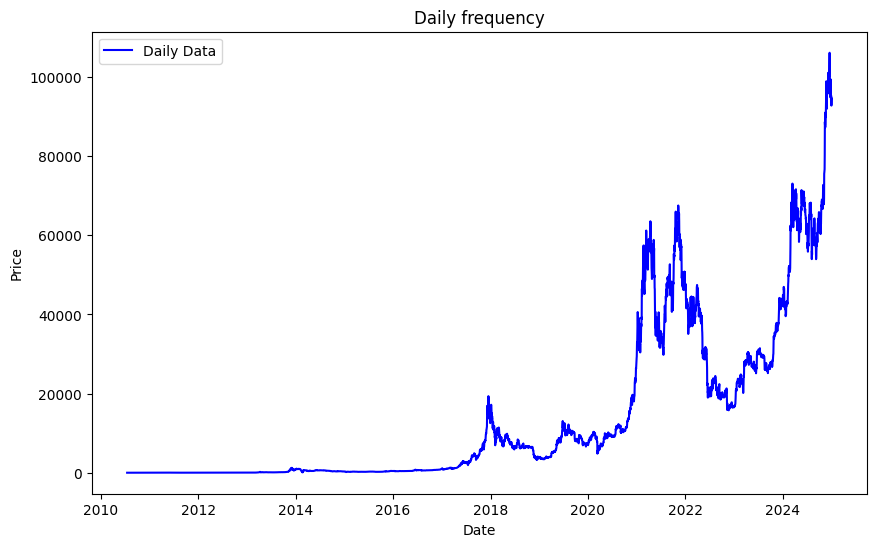

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(bitcoin.index, bitcoin['Price'], label='Daily Data', color='blue')
plt.title('Daily frequency')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

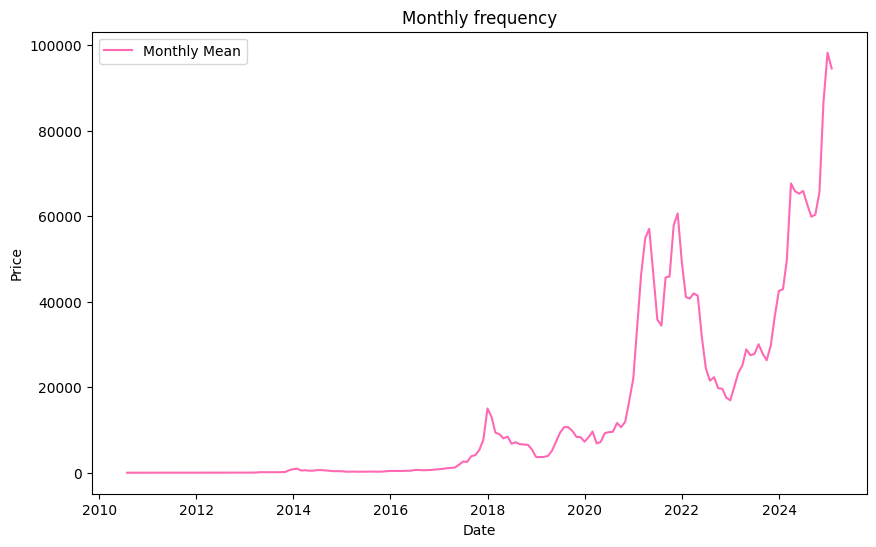

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Price'], label='Monthly Mean', color='hotpink')
plt.title('Monthly frequency')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

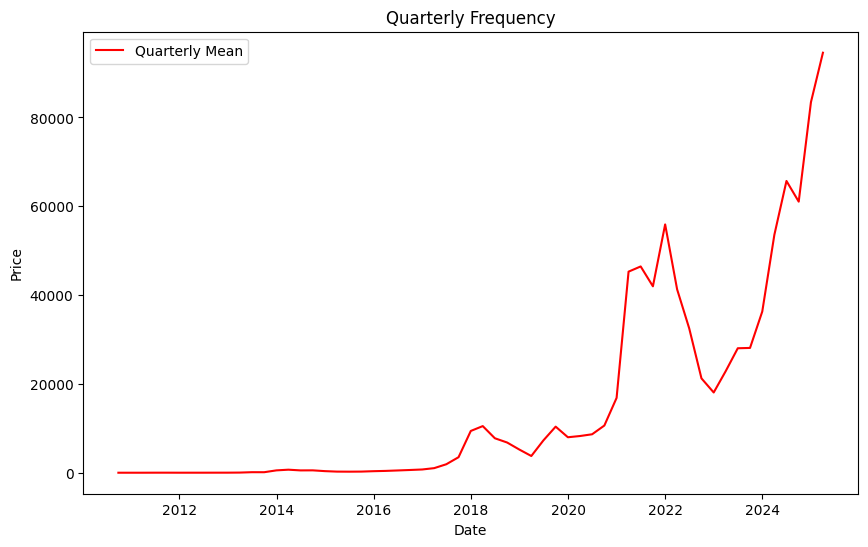

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(df_quarterly.index, df_quarterly['Price'], label='Quarterly Mean', color='red')
plt.title('Quarterly Frequency')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

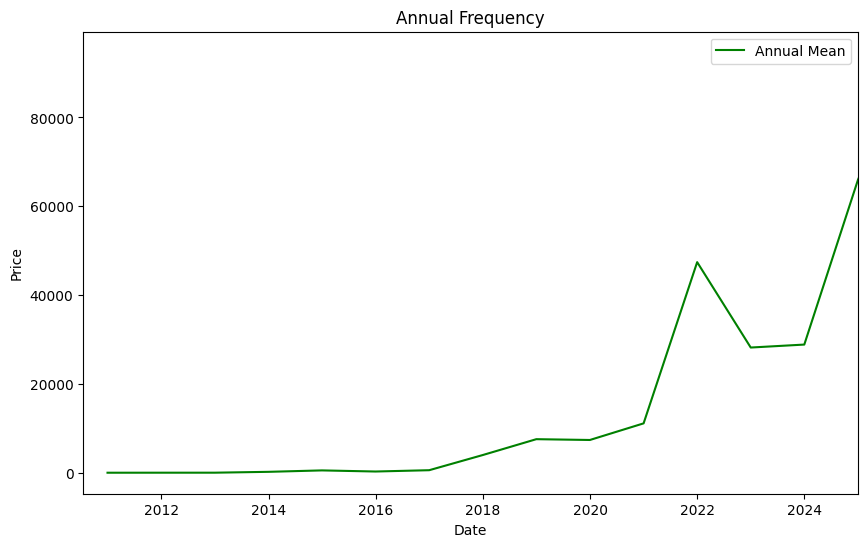

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df_annual.index, df_annual['Price'], label='Annual Mean', color='green')
plt.title('Annual Frequency')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xlim(bitcoin.index.min(), bitcoin.index.max())  # Set x-axis limits
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_23540\1308005142.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = bitcoin.resample('M').mean()
C:\Users\maria\AppData\Local\Temp\ipykernel_23540\1308005142.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = bitcoin.resample('Y').mean()
C:\Users\maria\AppData\Local\Temp\ipykernel_23540\1308005142.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = bitcoin.resample('Q').mean()


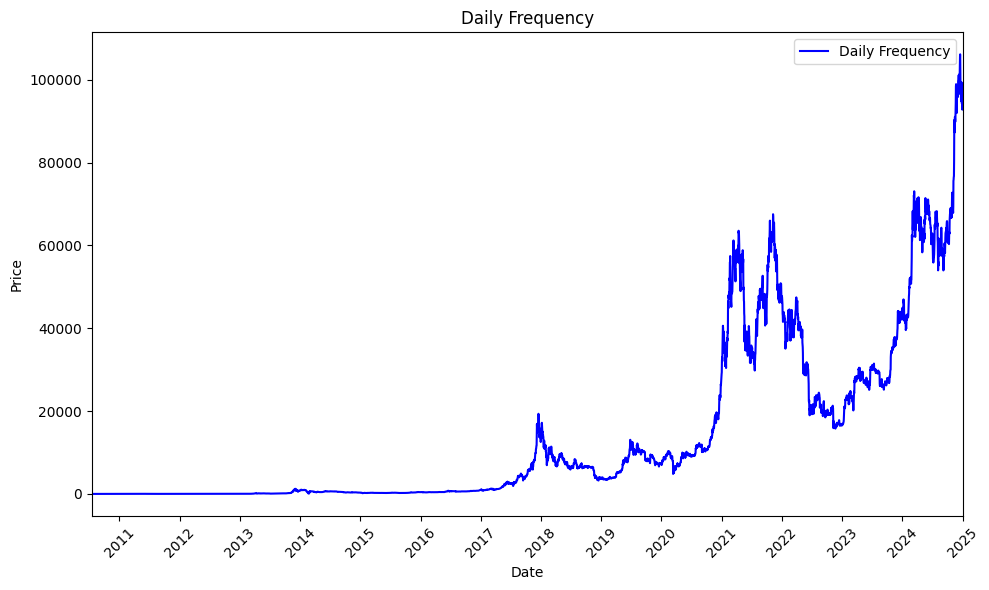

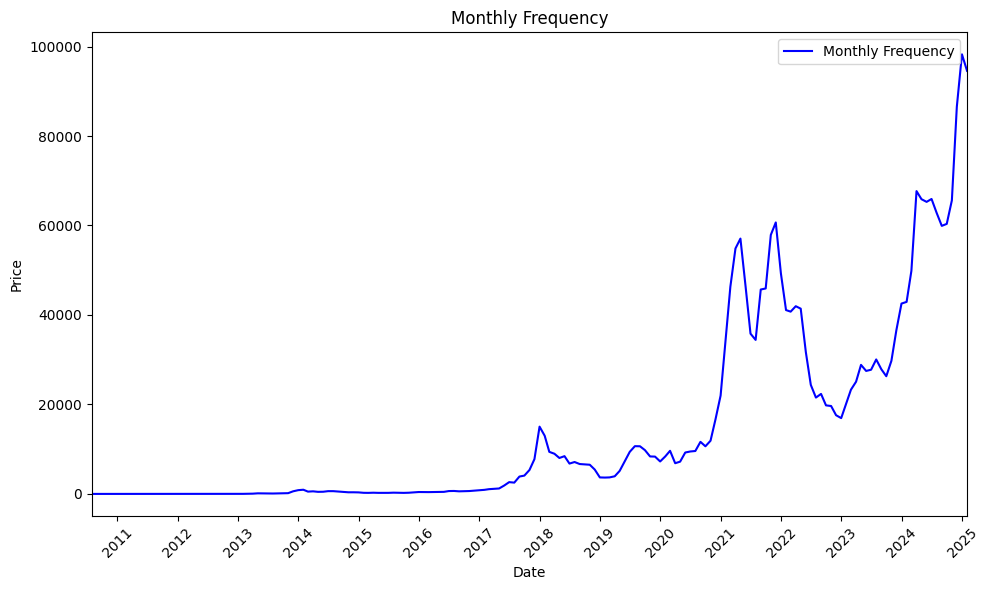

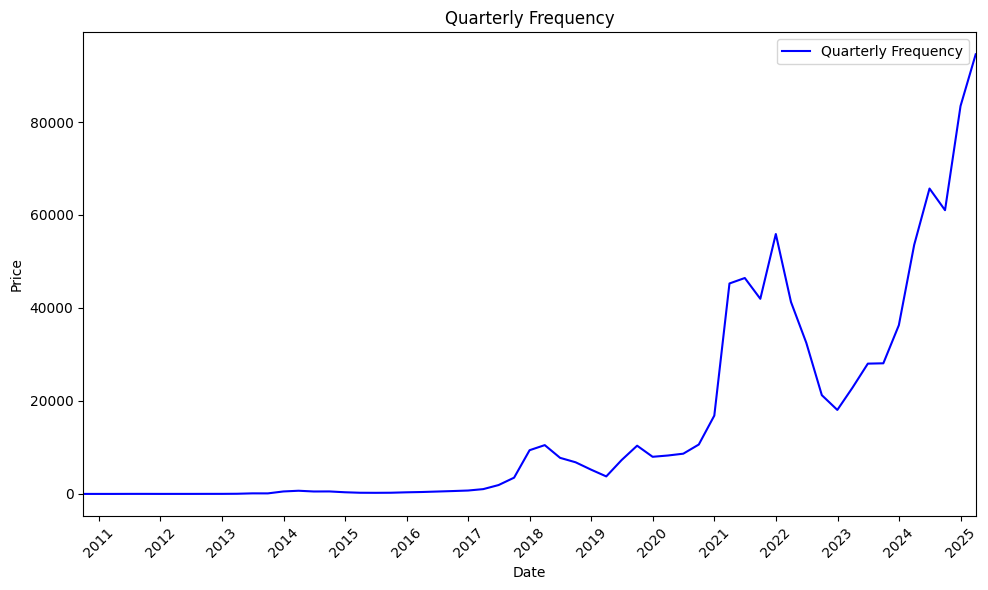

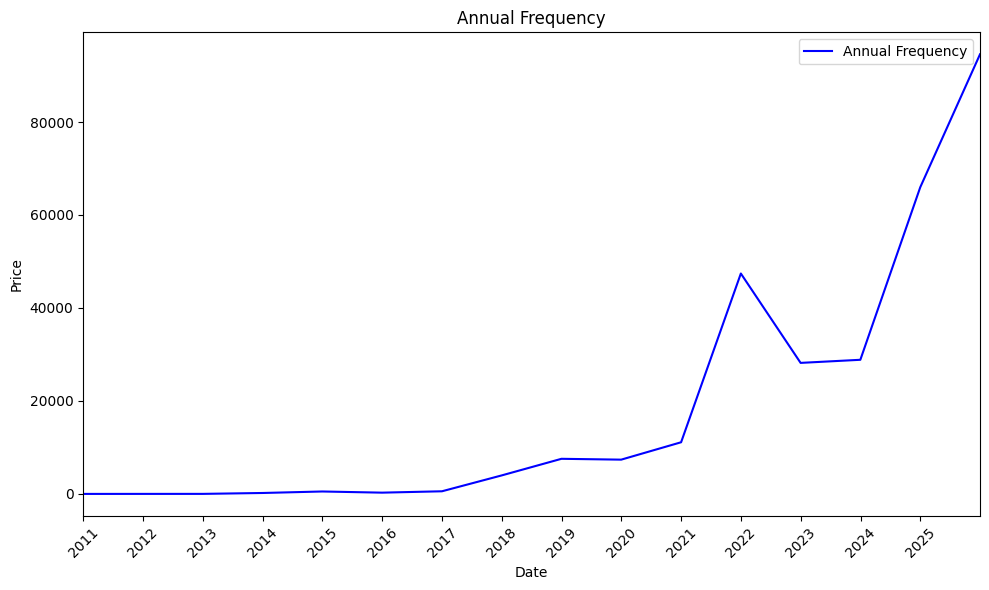

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Resample the data
df_monthly = bitcoin.resample('M').mean()
df_annual = bitcoin.resample('Y').mean()
df_quarterly = bitcoin.resample('Q').mean()

# Define a function to plot with all years shown on the x-axis
def plot_with_all_years(data, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Price'], label=title, color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()

    # Set x-axis major ticks to each year
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.xlim(data.index.min(), data.index.max())
    plt.tight_layout()
    plt.show()

# Plot daily data
plot_with_all_years(bitcoin, 'Daily Frequency', 'Price')

# Plot monthly resampled data
plot_with_all_years(df_monthly, 'Monthly Frequency', 'Price')

# Plot quarterly resampled data
plot_with_all_years(df_quarterly, 'Quarterly Frequency', 'Price')

# Plot annual resampled data
plot_with_all_years(df_annual, 'Annual Frequency', 'Price')
